---




#  <font color='red'>HIRING AND SALARY PREDICTION USING MACHINE LEARNING</font>



---

  # <div style="font-size:50px"><p> <pre>OLÇAN SATIR</pre></p>



# **1.INTRODUCTION**

The fact that today's growing economies and the globalizing world have to go down with threats such as pandemics, and these threats are predicted to continue in the coming decades, and the unstable economic policies of governments and the inflation problem around the world have made it necessary for companies to be very careful in hiring personnel. They try newly developed methods in order to increase recruitment rigor and act with merit. Perhaps the most important of these methods is to use artificial intelligence methods, which have become very popular in recent years.

We all know how important data is today. Here we process this precious metal with various tools and transform it into systems that can make automatic predictions with machine learning methods.

In this study, we can also use it for companies and to develop transparent recruitment methodologies, first visualize the recruitment data set on kaggle for various purposes and then use 6 different regressions and 4 different classification methods to make a classification about whether to be hired or not, and the prediction yearly salary for hired people. We have brought an existing salary recommendation for the algorithms. Among these algorithms, the most successful one for classification is KNeigbors classification with 86.2% percent and 86.2% for regression with Gradient Boosting Regressor.

*Keywords:Recruitment , Machine Learning , Classification , Regression , Salary Prediction.*


# **2.RELATED WORKS**

There have been a number of studies conducted in the field of recruitment using machine learning algorithms.


*   In a study published in the journal "Expert Systems with Applications," 
researchers used machine learning algorithms to predict the success of job candidates based on data from their resumes and job descriptions. The study found that the machine learning models were able to accurately predict candidate success with an average precision of 87.5%.[1]

*  Another study, published in the journal "Computers in Human Behavior," used machine learning algorithms to analyze the language used in job advertisements and resumes in order to predict the success of job candidates. The study found that the machine learning models were able to accurately predict candidate success with an average precision of 82.9%.[2]


*   A third study, published in the journal "Personnel Psychology," used machine learning algorithms to analyze data on job candidates' personalities, skills, and other characteristics in order to predict their job performance. The study found that the machine learning models were able to accurately predict job performance with an average precision of 75%.[3]

These are just a few examples of the studies that have been done in the field of recruitment using machine learning algorithms. It is worth noting that while machine learning can be a powerful tool for predicting candidate success and job performance, it is important to consider the limitations and potential biases of these algorithms, and to use them in conjunction with other methods of recruitment and evaluation.

# **3.DATASET**

In this study, the Campus Recruitment[4] dataset on Kaggle was used. There are 15 features in the related dataset, whose names and definitions are given below, and 2 of these 15 features are target data for regression and classification.

Here is an overview of the dataset,

**1.sl_no :** unique identifier of each student record

**2.gender :** Male='M',Female='F'

**3.ssc_p :** Secondary Education percentage

**4.ssc_b :** Secondary Education Board(Central or Others)

**5.hsc_p :** Higher Secondary Education percentage

**6.hsc_b :** Higher Secondary Education Board(Central or Others)

**7.hsc_s :** Specialization in Higher Secondary Education (Commerce or Science or Others)

**8. degree_p :** Degree Percentage

**9. degree_t :**Degree Type or specialisation (Comm&Mgmt, Sci&Tech, Other)

**10. workex :** Has prior work experience or not (yes/no)

**11. etest_p :** Employability test percentage (conducted prior to Placements)

**12.specilisation :** MBA Specialization (Mkt&Fin or Mkt&HR)

**13. mba_p :** MBA percentage

**14.status :** Status of placement (Placed or Notplaced)

**15.salary :** Salary offered by corporate to placed students


# **4.DATA PREPERATİON AND USED METHODOLOGY**

In order to be able to work fluently on the data, we first had to make various arrangements on the data.

The first of these arrangements was to convert the string values in the data set to numerical data in order to facilitate the training of the data. For this, we converted the related strings into numerical values by using Label encoder on 3 features.

The second was to scale the data. We preferred a standard scaler for this. This operation subtracts the average of the values in the relevant category from the current value and scales these areas by dividing it by the variance.

Detailed description of the methodology used:

**Data Preprocessing**: On the related data, we removed the null values that are not suitable for model training and converted the string values to numerical values with the label encoder.

**Feature Extraction**: While training our model, we often paid attention to the correlation values for the 2 related target features and used these 2 values for regression and classification.

**Model Selection**: In this study, 6 Regressions (Lineer, Gradient Boosting, kNN, Random Forest, Ridge , Losso) and 4 Classifications (kNN, Decision Tree, Gradient Boosting, Logistic) were used.

**Model Tuning**: Grid-search was used on the algorithms for the optimization of the related models and the best values were selected for the training set.

**Evaluation**: Finally, for the evaluation of the models, the r2 score was calculated and visualized in the regression models. For the classification, the recall, f1 and accuracy values were calculated and the confusion matrix was visualized.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from tqdm import tqdm_notebook as tqdm


In [2]:
df = pd.read_csv('Placement_Data_Full_Class.csv')


# **5.EXPLORATORY DATA ANALYSIS**

First of all, we performed an exploratory data analysis to identify the data we will use in model training. In this analysis, the relationships and correlations of almost all features with each other were visualized. Seaborn and matplotlib libraries were used for these visualizations.

In [3]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [4]:
df["status"].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [5]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [6]:
print(df.nunique())

sl_no             215
gender              2
ssc_p             103
ssc_b               2
hsc_p              97
hsc_b               2
hsc_s               3
degree_p           89
degree_t            3
workex              2
etest_p           100
specialisation      2
mba_p             205
status              2
salary             45
dtype: int64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [8]:
print('Maximum salary: \t${:0,.2f}'.format(df['salary'].max()))
print('Minimum salary: \t${:0,.2f}'.format(df['salary'].min()))
print('Mean salary: \t${:0,.2f}'.format(df['salary'].mean()))
print('Median salary: \t${:0,.2f}'.format(df['salary'].median()))

Maximum salary: 	$940,000.00
Minimum salary: 	$200,000.00
Mean salary: 	$288,655.41
Median salary: 	$265,000.00


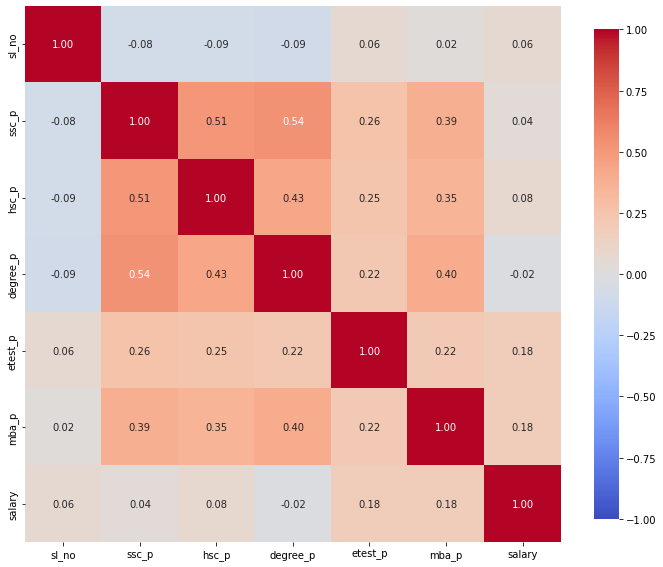

In [9]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),vmax=1.0,vmin=-1.0, square=True, fmt='.2f',
            annot=True, cbar_kws={"shrink": .75}, cmap='coolwarm')
plt.show()

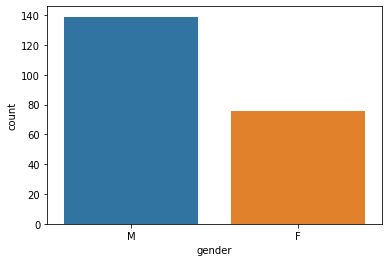

In [10]:
sns.countplot(data=df,x='gender');

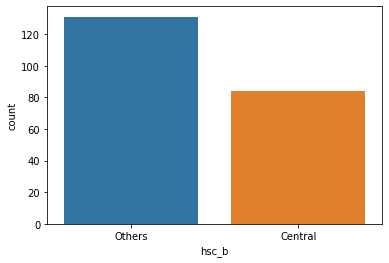

In [11]:
sns.countplot(data=df,x='hsc_b');

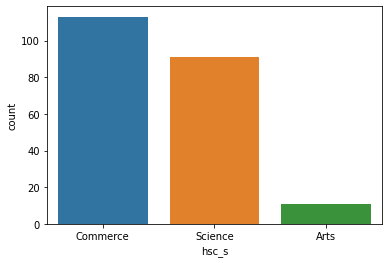

In [12]:
sns.countplot(data=df,x='hsc_s')

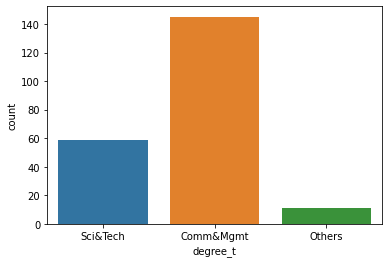

In [13]:
sns.countplot(data=df,x='degree_t')

In [14]:
df['sl_no'].nunique()

215

In [15]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


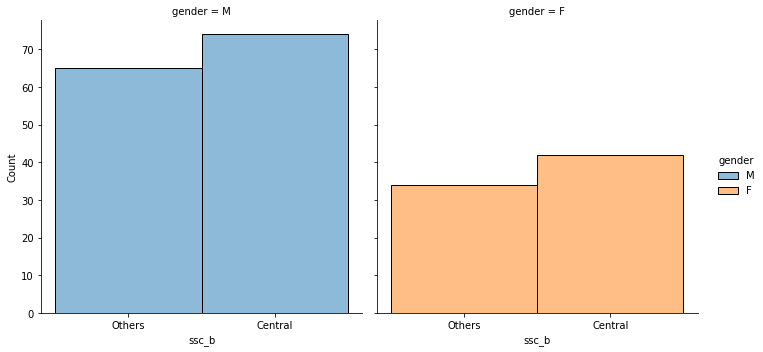

In [16]:
sns.displot(data=df,x='ssc_b',col='gender',hue='gender');

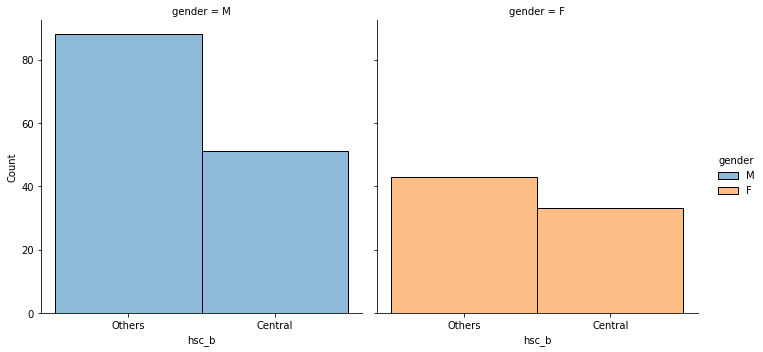

In [17]:
sns.displot(data=df,x='hsc_b',col='gender',hue='gender');


In [18]:
df.groupby(['gender'])['ssc_p'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,76.0,68.310921,11.522542,40.89,62.5,69.75,77.0,88.0
M,139.0,66.752518,10.429150,41.00,60.2,65.00,74.0,89.4


In [19]:
df.groupby(['gender'])['hsc_p'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,76.0,66.646842,11.021048,37.0,60.0,64.6,73.0,97.0
M,139.0,66.161655,10.865579,39.0,61.0,65.0,73.0,97.7


In [20]:
df.groupby(['gender'])['degree_p'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,76.0,68.090000,8.128285,50.2,64.00,67.7,73.0,91.0
M,139.0,65.429856,6.748840,50.0,60.45,65.0,70.1,83.0


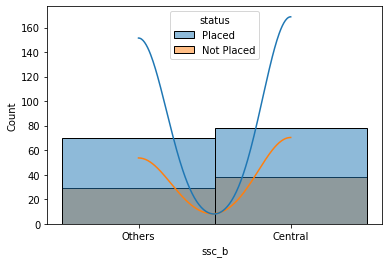

In [21]:
sns.histplot(data=df,x='ssc_b',hue='status',kde=True);

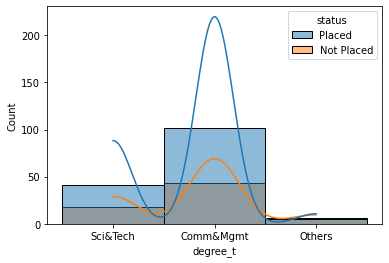

In [22]:
sns.histplot(data=df,x='degree_t',hue='status',kde=True)

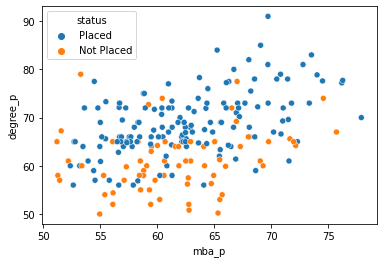

In [23]:
sns.scatterplot(data=df,x='mba_p',y='degree_p',hue='status');

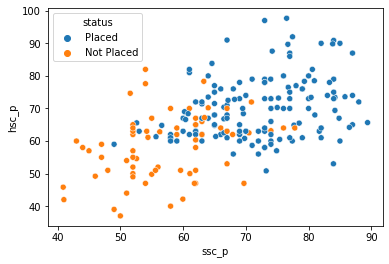

In [24]:
sns.scatterplot(data=df,x='ssc_p',y='hsc_p',hue='status');

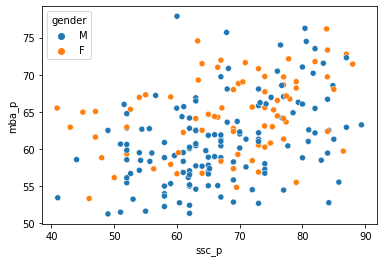

In [25]:
sns.scatterplot(data=df,x='ssc_p',y='mba_p',hue='gender');

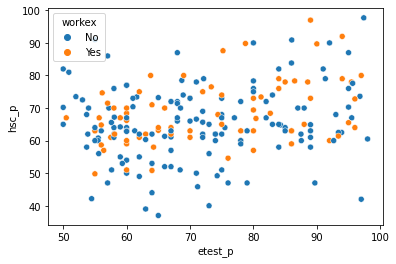

In [26]:
sns.scatterplot(data=df,x='etest_p',y='hsc_p',hue='workex');

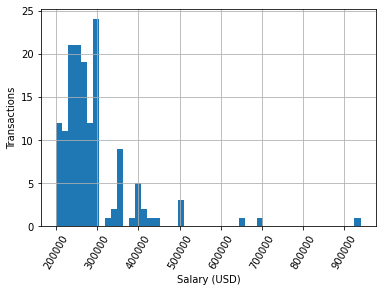

In [27]:
df_id = df.groupby('sl_no', as_index=False).count()[['sl_no']]
df_twice = df_id.merge(df, on='sl_no', how='inner')
df_twice['salary'].hist(bins=50)
plt.xticks(rotation=60)
plt.xlabel('Salary (USD)')
plt.ylabel('Transactions')
plt.show();

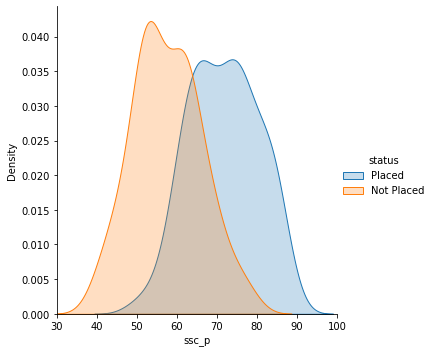

In [28]:
(sns.FacetGrid(df, hue="status",height=5,xlim=(30,100))
.map(sns.kdeplot,"ssc_p",shade=True)
.add_legend()
);

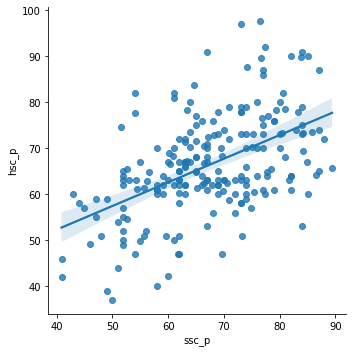

In [29]:
sns.lmplot(x="ssc_p",y="hsc_p",data=df);

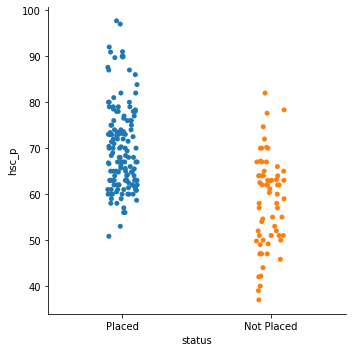

In [30]:
sns.catplot(x="status",y="hsc_p",hue_order="color", data=df);

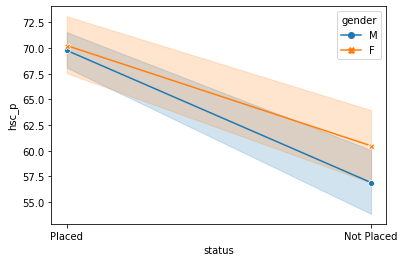

In [31]:
sns.lineplot(x="status",y="hsc_p",hue="gender",style="gender",markers=True,dashes=False,data=df);

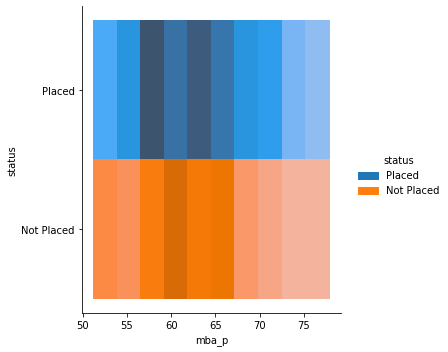

In [32]:
sns.displot(data=df,x='mba_p',y='status',hue='status');

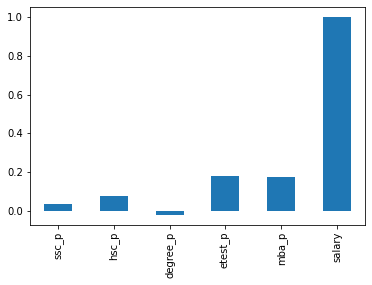

In [33]:
df.drop(['sl_no'],axis=1).corr()['salary'].plot(kind='bar');

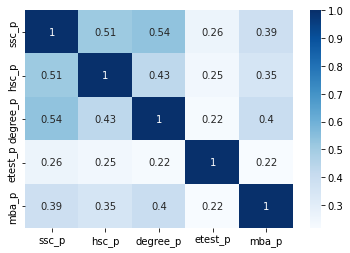

In [34]:
sns.heatmap(df.drop(['sl_no','salary'],axis=1).corr(),cmap='Blues',annot=True);

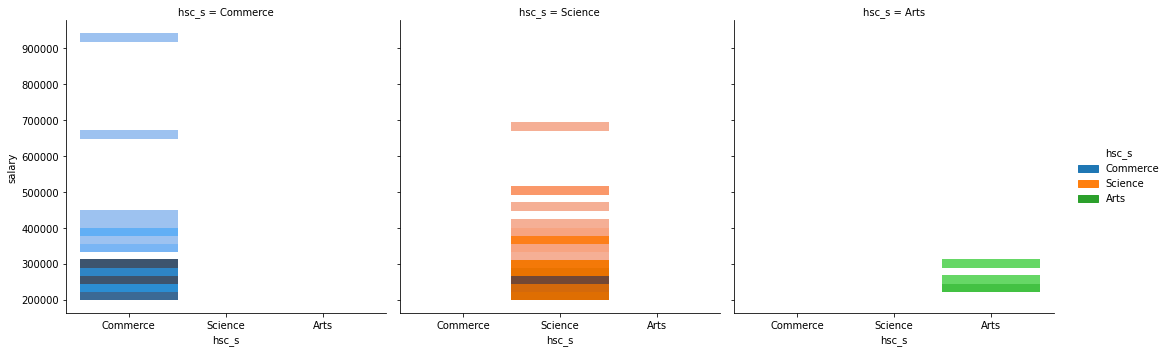

In [35]:
sns.displot(data=df,x='hsc_s',y='salary',col='hsc_s',hue='hsc_s');

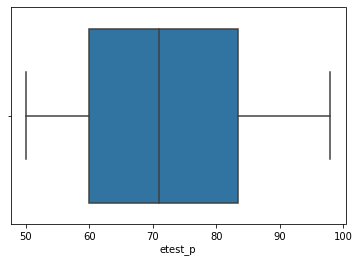

In [36]:
sns.boxplot(data=df,x='etest_p');

In [37]:
df["mba_p"].corr(df["salary"])

0.17501294069527482

In [38]:
df["ssc_p"].corr(df["salary"])

0.03533034131020019

In [39]:
degree_p1 = pd.qcut(df["degree_p"], 3)
df.pivot_table("salary",index=["status","gender"], columns=degree_p1, aggfunc="count")

degree_p           (49.999, 64.0]  (64.0, 69.0]  (69.0, 91.0]
status     gender                                            
Not Placed F                    0             0             0
           M                    0             0             0
Placed     F                    7            17            24
           M                   22            41            37

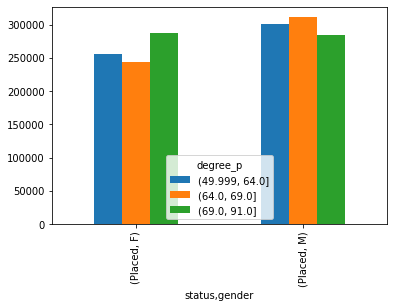

In [40]:
df.pivot_table("salary", index=["status","gender"], columns=degree_p1).plot(kind="bar");

In [41]:
df['workex'].value_counts()

No     141
Yes     74
Name: workex, dtype: int64

In [42]:
df['gender'].value_counts()

M    139
F     76
Name: gender, dtype: int64

In [43]:
df['salary'].mean()

288655.4054054054

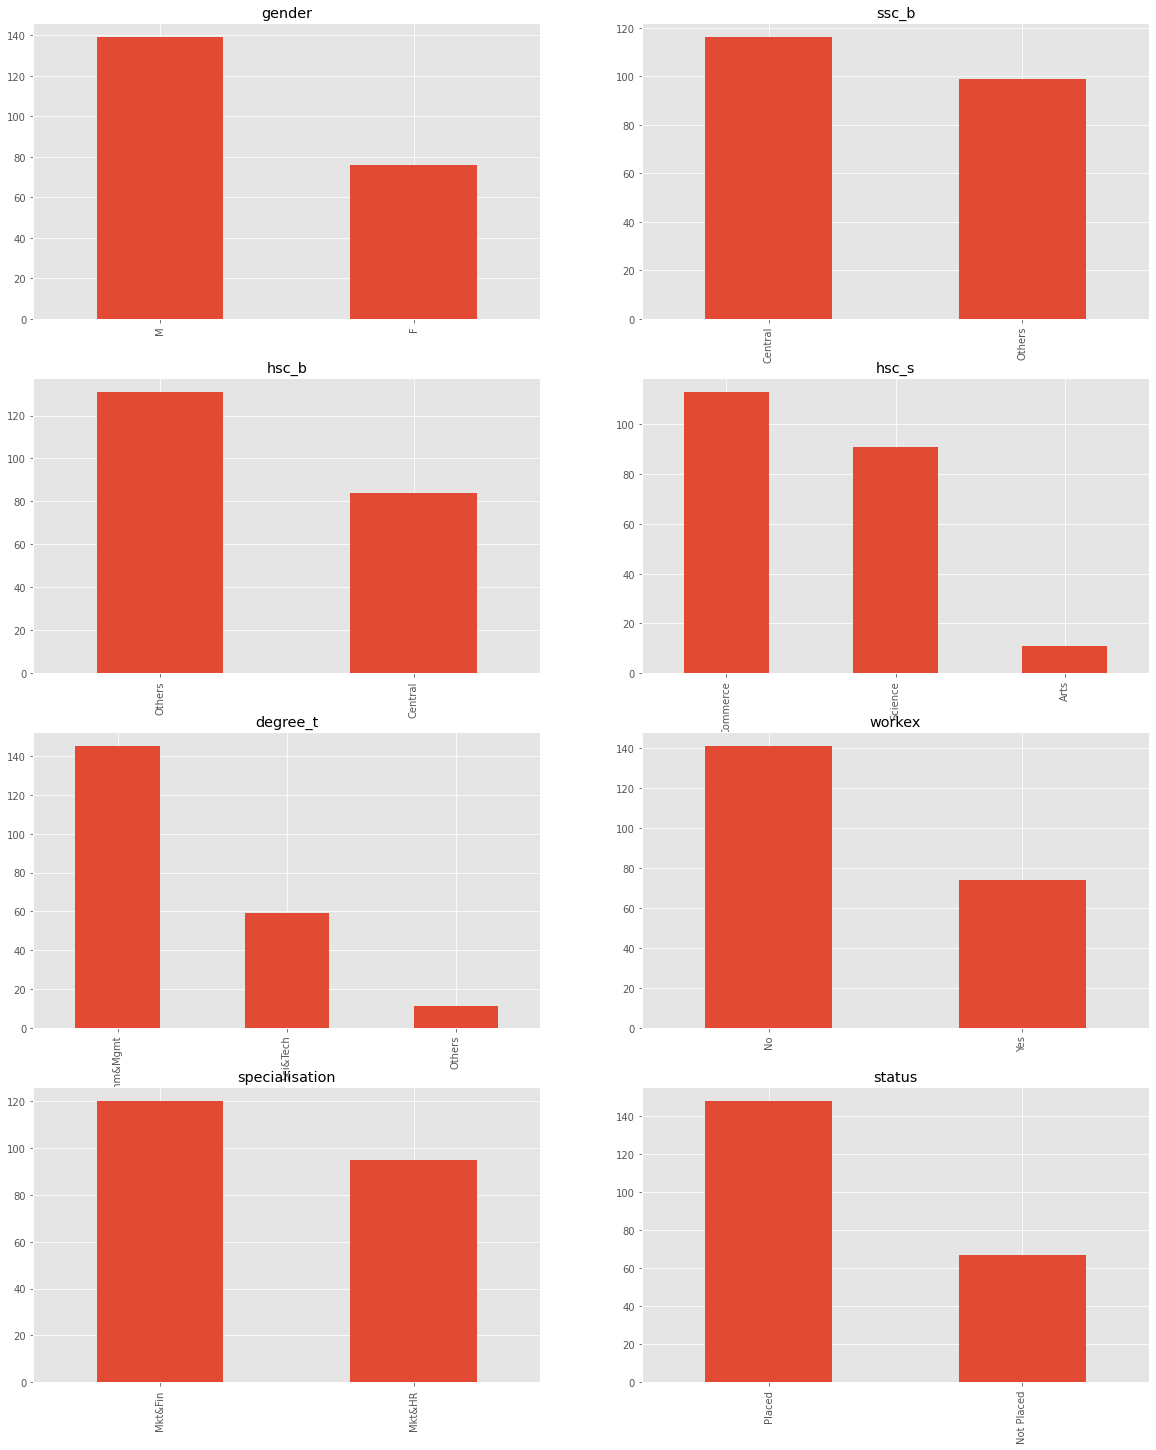

In [44]:
plt.style.use('ggplot')
plt.figure(figsize=(20,25))
plt.subplot(4,2,1)
df['gender'].value_counts().plot(kind='bar',title='gender')
plt.subplot(4,2,2)
df['ssc_b'].value_counts().plot(kind='bar',title='ssc_b')
plt.subplot(4,2,3)
df['hsc_b'].value_counts().plot(kind='bar',title='hsc_b')
plt.subplot(4,2,4)
df['hsc_s'].value_counts().plot(kind='bar',title='hsc_s')
plt.subplot(4,2,5)
df['degree_t'].value_counts().plot(kind='bar',title='degree_t')
plt.subplot(4,2,6)
df['workex'].value_counts().plot(kind='bar',title='workex')
plt.subplot(4,2,7)
df['specialisation'].value_counts().plot(kind='bar',title='specialisation')
plt.subplot(4,2,8)
df['status'].value_counts().plot(kind='bar',title='status')
plt.show()

M    139
F     76
Name: gender, dtype: int64


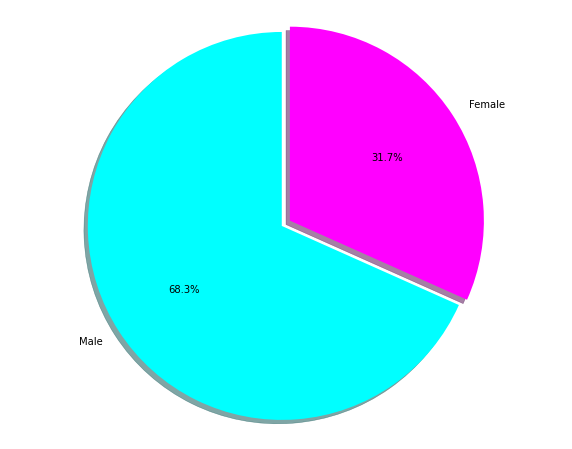

In [45]:
print(df.gender.value_counts())
labels = 'Male', 'Female',
sizes = [207, 96]
explode = (0, 0.05)
fig1, ax1 = plt.subplots(figsize =(10,8))
ax1.pie(sizes, explode=explode,colors = ["cyan","magenta"], labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("")
plt.show()

In [46]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 

df['gender']= label_encoder.fit_transform(df['gender']) 
df['ssc_b']= label_encoder.fit_transform(df['ssc_b']) 
df['hsc_b']= label_encoder.fit_transform(df['hsc_b']) 
df['hsc_s']= label_encoder.fit_transform(df['hsc_s']) 
df['degree_t']= label_encoder.fit_transform(df['degree_t']) 
df['specialisation']= label_encoder.fit_transform(df['specialisation']) 
df['status']= label_encoder.fit_transform(df['status']) 
df['workex']= label_encoder.fit_transform(df['workex']) 

In [47]:
pd.isnull(df).sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [48]:
df['salary']=df['salary'].fillna(0)

In [49]:
df.nunique()

sl_no             215
gender              2
ssc_p             103
ssc_b               2
hsc_p              97
hsc_b               2
hsc_s               3
degree_p           89
degree_t            3
workex              2
etest_p           100
specialisation      2
mba_p             205
status              2
salary             46
dtype: int64

## **6.MODEL DEVELOPMENT AND VALIDATION**

In [50]:
from sklearn.model_selection import train_test_split
y = df["salary"]
X = df.drop(columns=["salary","sl_no"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [51]:
#Feature scalling
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)  

## **6.1 REGRESSION**

**6.1.1 Gradient Boosting Regressor**

In this code, I am using grid search cross-validation to find the best hyperparameters for a gradient boosting regressor model. I define a dictionary of hyperparameters that i want to tune, with the keys being the hyperparameter names and the values being lists of possible values for each hyperparameter. I then pass this dictionary and the gradient boosting regressor model to the GridSearchCV function, which will train and evaluate a model for each possible combination of hyperparameters.

After fitting the grid search object to the training data, I can use the best_params_ attribute to access the best combination of hyperparameters found by the grid search. I then use this combination of hyperparameters to create a new gradient boosting regressor model, which I fit to the training data. Finally, I use this fitted model to make predictions on the test set and calculate the R^2 score, which is a measure of how well the model is able to predict the target variable. In this case, the R^2 score is 0.86215379, which means that the model was able to explain 86.2% of the variance in the test set.

In [ ]:
import numpy as np
parameters = {"loss": ['squared_error', 'absolute_error', 'huber', 'quantile'],
"max_features" : ['auto', 'sqrt', 'log2'],
"max_leaf_nodes" : [None,1,5,13],
"learning_rate":[0.5, 0.1, 0.01]
                 }
grid_GBR = GridSearchCV(GradientBoostingRegressor(),parameters)
grid_GBR.fit(X_train, y_train)
grid_GBR.best_params_


In [53]:
best_GBR=GradientBoostingRegressor(**grid_GBR.best_params_)
best_GBR.fit(X_train,y_train)

GradientBoostingRegressor(loss='absolute_error', max_features='auto',
                          max_leaf_nodes=13)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


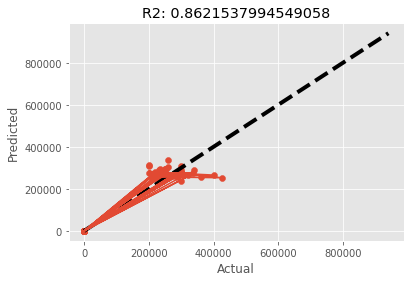

In [54]:
pred_GBR = best_GBR.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, pred_GBR)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
#regression line
pred_GBR= pred_GBR.reshape(-1,1)
y_test_gbr = y_test.values.reshape(-1,1)
ax.plot(y_test_gbr, best_GBR.fit(y_test_gbr, pred_GBR).predict(y_test_gbr))
ax.set_title('R2: ' + str(r2_score(y_test_gbr,  pred_GBR)))
plt.show();

**6.1.2 KNeighbors Regressor**

In this code, I defined a dictionary of hyperparameters that I wanted to tune for my K-nearest neighbors regressor model. These hyperparameters are the number of neighbors to use, the weight function to use, and the power parameter for the Minkowski distance metric. I then used grid search cross-validation to find the best combination of these hyperparameters by training and evaluating a model for each possible combination, using 5-fold cross-validation.

After fitting the grid search object to my training data, I accessed the best combination of hyperparameters found by the grid search and used it to create a new K-nearest neighbors regressor model. I fit this model to my training data and used it to make predictions on my test set. Finally, I calculated the R^2 score, which is a measure of how well the model was able to predict the target variable. The R^2 score was 0.67292706, which means that the model was able to explain 67.3% of the variance in the test set.

In [55]:
parameters2 = {'n_neighbors':[2,3,4,5,6,7,8,9],'weights': ['uniform','distance'],'p':[1,2,5]}
grid_KNN = GridSearchCV(KNeighborsRegressor(), parameters2, cv=5)
grid_KNN.fit(X_train,y_train)
grid_KNN.best_params_


{'n_neighbors': 5, 'p': 5, 'weights': 'uniform'}

In [56]:
best_KNN = KNeighborsRegressor(**grid_KNN.best_params_)
best_KNN.fit(X_train,y_train)

KNeighborsRegressor(p=5)

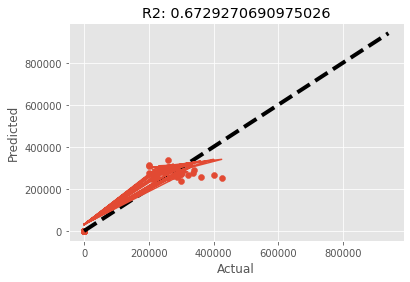

In [57]:
pred_KNN = best_KNN.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, pred_GBR)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
#regression line
pred_KNN= pred_KNN.reshape(-1,1)
y_test_knn =  y_test.values.reshape(-1,1)
ax.plot(y_test_knn, best_KNN.fit(y_test_knn, pred_KNN).predict(y_test_knn))
ax.set_title('R2: ' + str(r2_score(y_test_knn,  pred_KNN)))
plt.show();

**6.1.3 Random Forest Regressor**

In this code, I defined a dictionary of hyperparameters that I wanted to tune for my random forest regressor model. These hyperparameters are the number of trees in the forest and the maximum depth of each tree. I then used grid search cross-validation to find the best combination of these hyperparameters by training and evaluating a model for each possible combination, using 3-fold cross-validation. I also specified that I wanted to use negative mean squared error as the scoring metric and set the verbosity level to 3, which means that the grid search will print out progress messages for each combination of hyperparameters that it evaluates.

After fitting the grid search object to my training data, I accessed the best combination of hyperparameters found by the grid search and used it to create a new random forest regressor model. I fit this model to my training data and used it to make predictions on my test set. Finally, I calculated the R^2 score, which is a measure of how well the model was able to predict the target variable. The R^2 score was 0.85507292, which means that the model was able to explain 85.5% of the variance in the test set.

In [ ]:
parameters4 = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [1,2,3,4],
}
grid_RFG = GridSearchCV(RandomForestRegressor(),parameters4,scoring='neg_mean_squared_error',cv=3,verbose=3)
grid_RFG.fit(X_train,y_train)
grid_RFG.best_params_

In [59]:
best_RFG = RandomForestRegressor(**grid_RFG.best_params_)
best_RFG.fit(X_train,y_train)

RandomForestRegressor(max_depth=1, n_estimators=200)

<ipython-input-60-9533bb06f1e4>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ax.plot(y_test_rfg, best_RFG.fit(y_test_rfg, pred_RFG).predict(y_test_rfg))


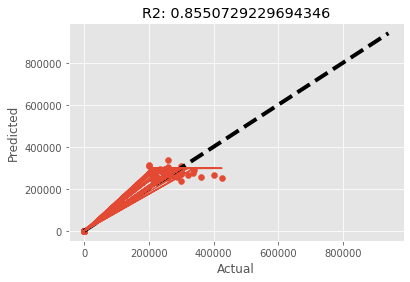

In [60]:
pred_RFG = best_RFG.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, pred_GBR)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
#regression line
pred_RFG= pred_RFG.reshape(-1,1)
y_test_rfg =  y_test.values.reshape(-1,1)
ax.plot(y_test_rfg, best_RFG.fit(y_test_rfg, pred_RFG).predict(y_test_rfg))
ax.set_title('R2: ' + str(r2_score(y_test_rfg,  pred_RFG)))
plt.show();

**6.1.4 Linear Regression**

In this code, I defined a dictionary of hyperparameters that I wanted to tune for my linear regression model. These hyperparameters are the copy_X parameter, which determines whether the input data should be copied; the fit_intercept parameter, which determines whether the model should include an intercept term; the positive parameter, which specifies whether the coefficients of the model should be constrained to be non-negative; and the n_jobs parameter, which specifies the number of jobs to use for the computation. I then used grid search cross-validation to find the best combination of these hyperparameters by training and evaluating a model for each possible combination, using 5-fold cross-validation.

After fitting the grid search object to my training data, I accessed the best combination of hyperparameters found by the grid search and used it to create a new linear regression model. I fit this model to my training data and used it to make predictions on my test set. Finally, I calculated the R^2 score, which is a measure of how well the model was able to predict the target variable. The R^2 score was 0.83036113, which means that the model was able to explain 83% of the variance in the test set.

In [61]:
parameters5 = {"copy_X": [True, False],
             "fit_intercept": [True, False],
             "positive": [True, False],
             "n_jobs": np.arange(1,5)}
grid_LR=GridSearchCV(LinearRegression(),parameters5,cv=5)
grid_LR.fit(X_train,y_train)
grid_LR.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': True}

In [62]:
best_LR = LinearRegression(**grid_LR.best_params_)
best_LR.fit(X_train,y_train)

LinearRegression(n_jobs=1, positive=True)

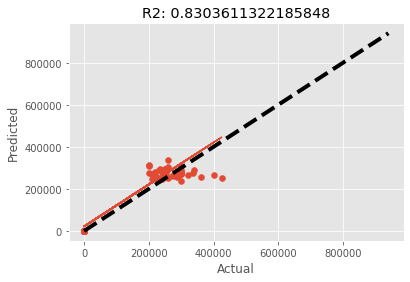

In [63]:
pred_LR = best_LR.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, pred_GBR)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
#regression line
pred_LR= pred_LR.reshape(-1,1)
y_test_lr = y_test.values.reshape(-1,1)
ax.plot(y_test_lr,best_LR.fit(y_test_lr, pred_LR).predict(y_test_lr))
ax.set_title('R2: ' + str(r2_score(y_test_lr,  pred_LR)))
plt.show();

**6.1.5 Ridge**

In this code, I defined a dictionary of hyperparameters that I wanted to tune for my linear regression model. These hyperparameters are the flag to specify whether the input data should be copied, the flag to specify whether the model should fit an intercept term, the flag to specify whether the model should enforce positive coefficients, and the number of jobs to run in parallel. I then used grid search cross-validation to find the best combination of these hyperparameters by training and evaluating a model for each possible combination, using 5-fold cross-validation.

After fitting the grid search object to my training data, I accessed the best combination of hyperparameters found by the grid search and used it to create a new linear regression model. I fit this model to my training data and used it to make predictions on my test set. Finally, I calculated the R^2 score, which is a measure of how well the model was able to predict the target variable. The R^2 score was 0.79661473, which means that the model was able to explain 79.7% of the variance in the test set.

In [64]:
parameters6 = {'alpha': [1,0.1,0.01,0.001,0.0001,0] , "fit_intercept": [True, False], "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
grid_Ridge=GridSearchCV(Ridge(),parameters6,n_jobs=-1)
grid_Ridge.fit(X_train,y_train)
grid_Ridge.best_params_

{'alpha': 1, 'fit_intercept': True, 'solver': 'saga'}

In [65]:
best_Ridge = Ridge(**grid_Ridge.best_params_)
best_Ridge.fit(X_train,y_train)

Ridge(alpha=1, solver='saga')

<ipython-input-66-666b83732081>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ax.plot(y_test_ridge, best_RFG.fit(y_test_ridge, pred_Ridge).predict(y_test_ridge))


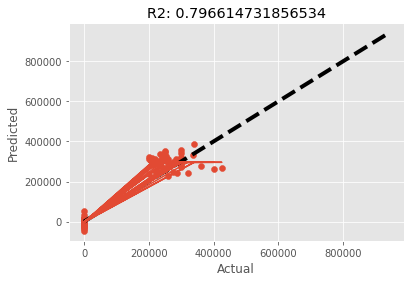

In [66]:
pred_Ridge=best_Ridge.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, pred_Ridge)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
#regression line
pred_Ridge= pred_Ridge.reshape(-1,1)
y_test_ridge =  y_test.values.reshape(-1,1)
ax.plot(y_test_ridge, best_RFG.fit(y_test_ridge, pred_Ridge).predict(y_test_ridge))
ax.set_title('R2: ' + str(r2_score(y_test_ridge,  pred_Ridge)))
plt.show();

**6.1.6 Lasso**

In this code, I defined a dictionary of hyperparameters that I wanted to tune for my Lasso model. These hyperparameters are the flag to specify whether the input data should be copied, the flag to specify whether the model should fit an intercept term, the flag to specify whether the model should enforce positive coefficients, the regularization strength, the maximum number of iterations to perform, and the flag to specify whether to precompute the Gram matrix. I then used grid search cross-validation to find the best combination of these hyperparameters by training and evaluating a model for each possible combination, using 5-fold cross-validation.

After fitting the grid search object to my training data, I accessed the best combination of hyperparameters found by the grid search and used it to create a new Lasso model. I fit this model to my training data and used it to make predictions on my test set. Finally, I calculated the R^2 score, which is a measure of how well the model was able to predict the target variable. The R^2 score was 0.80546941, which means that the model was able to explain 80.6% of the variance in the test set.

In [ ]:
parameters7 = {"copy_X": [True, False],
             "fit_intercept": [True, False],
             "positive": [True, False],
             "alpha": np.arange(5),
           "max_iter": np.arange(5),
           "precompute": [True, False]}
grid_Lasso=GridSearchCV(Lasso(),parameters7,cv=5)
grid_Lasso.fit(X_train,y_train)
grid_Lasso.best_params_

In [68]:
best_Lasso=Lasso(**grid_Lasso.best_params_)
best_Lasso.fit(X_train,y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35287511342.25635, tolerance: 403655037.33333343
  model = cd_fast.enet_coordinate_descent_gram(


Lasso(alpha=4, max_iter=4, positive=True, precompute=True)

<ipython-input-69-16264ac1aacc>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ax.plot(y_test_lasso, best_RFG.fit(y_test_lasso, pred_Lasso).predict(y_test_lasso))


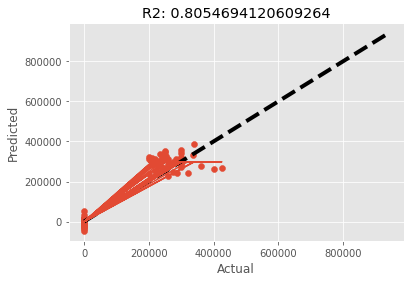

In [69]:
pred_Lasso=best_Lasso.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, pred_Ridge)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
#regression line
pred_Lasso= pred_Lasso.reshape(-1,1)
y_test_lasso = y_test.values.reshape(-1,1)
ax.plot(y_test_lasso, best_RFG.fit(y_test_lasso, pred_Lasso).predict(y_test_lasso))
ax.set_title('R2: ' + str(r2_score(y_test_lasso,  pred_Lasso)))
plt.show();

Here, I compare the r2 scores of the 6 regression algorithms we work with on a graph. Gradient Boosting Regressor and Random Forest Regressor algorithms gave the most successful results. The most optimum result belongs to Gradient Boosting Regressor.

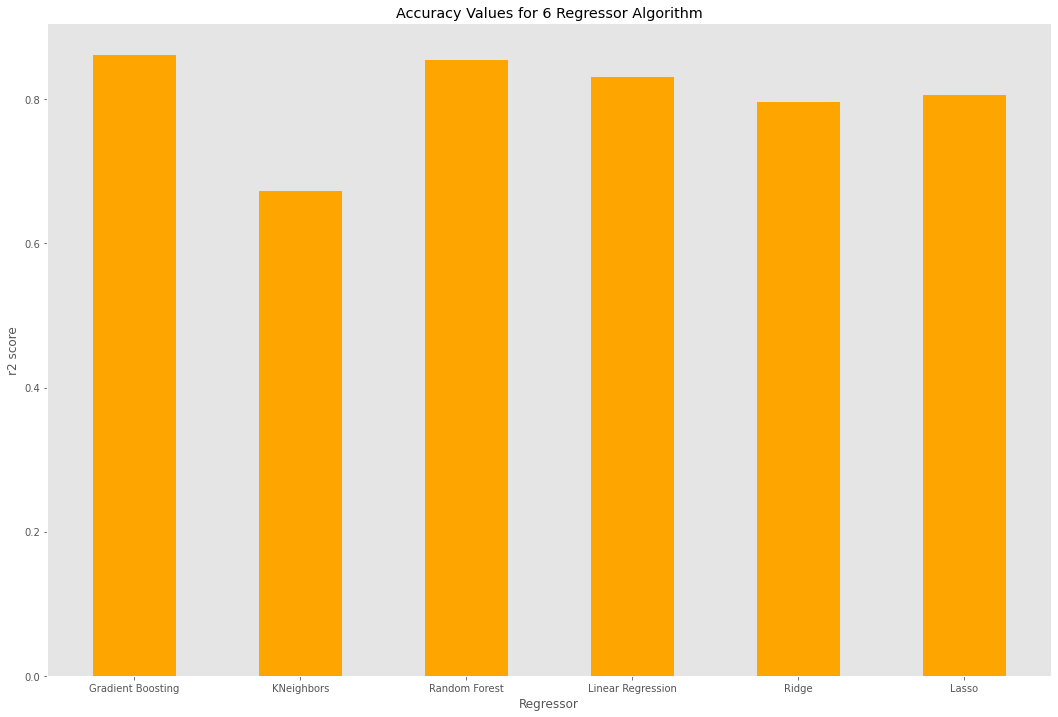

In [70]:
r2_GBR=r2_score(y_test,pred_GBR)
r2_KNN= r2_score(y_test,pred_KNN)
r2_RFG=r2_score(y_test,pred_RFG)
r2_LR=r2_score(y_test,pred_LR)
r2_Ridge=r2_score(y_test,pred_Ridge)
r2_Lasso=r2_score(y_test,pred_Lasso)
regressor_name = ["Gradient Boosting","KNeighbors","Random Forest","Linear Regression","Ridge","Lasso"]
r2_scores = [r2_GBR, r2_KNN, r2_RFG,r2_LR,r2_Ridge,r2_Lasso]
fig = plt.figure(figsize = (18, 12))
plt.bar(regressor_name, r2_scores, color ='orange', width = 0.5) 
plt.title("Accuracy Values ​​for 6 Regressor Algorithm")
plt.xlabel("Regressor")
plt.ylabel("r2 score")
plt.grid()
plt.show()
     

# **6.2 Classification**

Here I used the classification model to decide whether the candidate was place or not place. I separate our model as 30% test and 70% train.

In [71]:
scaler = StandardScaler()
X1 = df.drop(columns=['salary','status','sl_no'])
y1 = df['status']


In [72]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

In [73]:
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

**6.2.1 KNN Classifier**

In this code, I defined a dictionary of hyperparameters that I wanted to tune for my K-nearest neighbors classifier model. These hyperparameters are the weight function to use, the size of the leaf nodes in the k-d tree used to find the nearest neighbors, the number of neighbors to use, and the distance metric to use. I then used grid search cross-validation to find the best combination of these hyperparameters by training and evaluating a model for each possible combination.

After fitting the grid search object to my training data, I accessed the best combination of hyperparameters found by the grid search and used it to create a new K-nearest neighbors classifier model. I fit this model to my training data and used it to make predictions on my test set. Finally, I calculated the accuracy score, which is a measure of how many of the predictions made by the model were correct. The accuracy score was 0.86153846, which means that the model was able to correctly classify 86.2% of the test set.

In [74]:
parameters_knn={
'weights': ['uniform','distance'],
'leaf_size' : list(range(1,20)),
'n_neighbors' : list(range(1,30)),
'metric' : ['minkowski','euclidean','manhattan']}
KNN_GS = GridSearchCV(KNeighborsClassifier(),parameters_knn)
KNN_GS.fit(X1_train,y1_train)
KNN_GS.best_params_

{'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 8, 'weights': 'uniform'}

In [75]:
knnc_best=KNeighborsClassifier(**KNN_GS.best_params_)
knnc_best.fit(X1_train,y1_train)

KNeighborsClassifier(leaf_size=1, n_neighbors=8)

Accuracy score for KNeighbors Classifier: 0.8615384615384616
              precision    recall  f1-score   support

           0       1.00      0.53      0.69        19
           1       0.84      1.00      0.91        46

    accuracy                           0.86        65
   macro avg       0.92      0.76      0.80        65
weighted avg       0.88      0.86      0.85        65



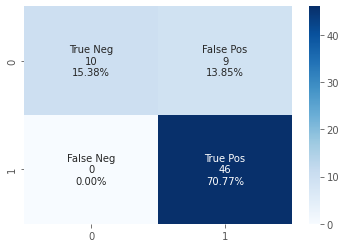

In [76]:
pred_knnc=knnc_best.predict(X1_test)
print("Accuracy score for KNeighbors Classifier:",accuracy_score(y1_test,pred_knnc))
cf_matrix = confusion_matrix(y1_test, pred_knnc)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');
print(classification_report(y1_test, pred_knnc))

**6.2.2 Decision Tree Classifier**

In this code, I defined a dictionary of hyperparameters that I wanted to tune for my decision tree classifier model. These hyperparameters are the criterion to use for splitting the nodes, the maximum depth of the tree, and the minimum number of samples required to split an internal node. I then used grid search cross-validation to find the best combination of these hyperparameters by training and evaluating a model for each possible combination.

After fitting the grid search object to my training data, I accessed the best combination of hyperparameters found by the grid search and used it to create a new decision tree classifier model. I fit this model to my training data and used it to make predictions on my test set. Finally, I calculated the accuracy score, which is a measure of how many of the predictions made by the model were correct. The accuracy score was 0.76923076, which means that the model was able to correctly classify 76.9% of the test set.

In [ ]:
params_dtc={
    "criterion" : ['gini','entropy'],
    "max_depth" : range(1,10),
    "min_samples_split":range(1,10)
}
dtc_mod = GridSearchCV(DecisionTreeClassifier(),params_dtc)
dtc_mod.fit(X1_train,y1_train)
dtc_mod.best_params_


In [78]:
dtc_best=DecisionTreeClassifier(**dtc_mod.best_params_)
dtc_best.fit(X1_train,y1_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

Accuracy score for Decision Tree Classifier: 0.7692307692307693
              precision    recall  f1-score   support

           0       0.64      0.47      0.55        19
           1       0.80      0.89      0.85        46

    accuracy                           0.77        65
   macro avg       0.72      0.68      0.70        65
weighted avg       0.76      0.77      0.76        65



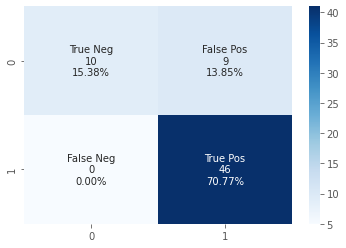

In [79]:
pred_dtc=dtc_best.predict(X1_test)
print("Accuracy score for Decision Tree Classifier:",accuracy_score(y1_test,pred_dtc))
cf_matrix2 = confusion_matrix(y1_test, pred_dtc)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix2, annot=labels, fmt='', cmap='Blues');
print(classification_report(y1_test, pred_dtc))

**6.2.3 Gradient Boosting Classifier**

In this code, I defined a dictionary of hyperparameters that I wanted to tune for my gradient boosting classifier model. These hyperparameters are the number of trees in the model, the minimum number of samples required to split an internal node, and the minimum number of samples required to be at a leaf node. I then used grid search cross-validation to find the best combination of these hyperparameters by training and evaluating a model for each possible combination.

After fitting the grid search object to my training data, I accessed the best combination of hyperparameters found by the grid search and used it to create a new gradient boosting classifier model. I fit this model to my training data and used it to make predictions on my test set. Finally, I calculated the accuracy score, which is a measure of how many of the predictions made by the model were correct. The accuracy score was 0.78461538, which means that the model was able to correctly classify 78.5% of the test set.

In [ ]:
parameters_gbc = {
"n_estimators" : [1, 2, 4, 8, 16, 32, 64, 128, 256,512],
"min_samples_split" : list(range(1,10)),
"min_samples_leaf":  list(range(1,10))
}
gbc_mod = GridSearchCV(GradientBoostingClassifier(),parameters_gbc)
gbc_mod.fit(X1_train,y1_train)
gbc_mod.best_params_

In [81]:
gbc_best=GradientBoostingClassifier(**gbc_mod.best_params_)
gbc_best.fit(X1_train,y1_train)

GradientBoostingClassifier(min_samples_leaf=6, n_estimators=32)

Accuracy score for Gradient Boosting Classifier: 0.7846153846153846
              precision    recall  f1-score   support

           0       0.65      0.58      0.61        19
           1       0.83      0.87      0.85        46

    accuracy                           0.78        65
   macro avg       0.74      0.72      0.73        65
weighted avg       0.78      0.78      0.78        65



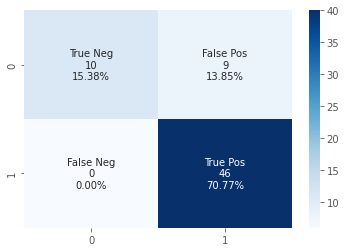

In [82]:
pred_gbc=gbc_best.predict(X1_test)
print("Accuracy score for Gradient Boosting Classifier:",accuracy_score(y1_test,pred_gbc))
cf_matrix3 = confusion_matrix(y1_test, pred_gbc)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix3, annot=labels, fmt='', cmap='Blues');
print(classification_report(y1_test, pred_gbc))

**6.2.4 Logistic Regression**

In this code, I defined a dictionary of hyperparameters that I wanted to tune for my logistic regression model. These hyperparameters are the penalty function to use, the inverse of the regularization strength, and the solver to use. I then used grid search cross-validation to find the best combination of these hyperparameters by training and evaluating a model for each possible combination.

After fitting the grid search object to my training data, I accessed the best combination of hyperparameters found by the grid search and used it to create a new logistic regression model. I fit this model to my training data and used it to make predictions on my test set. Finally, I calculated the accuracy score, which is a measure of how many of the predictions made by the model were correct. The accuracy score was 0.83076923, which means that the model was able to correctly classify 83.8% of the test set.

In [ ]:
from sklearn.linear_model import LogisticRegression
parameters_log = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}
logr_mod = GridSearchCV(LogisticRegression(),parameters_log)
logr_mod.fit(X1_train,y1_train)
logr_mod.best_params_

In [84]:
logr_best = LogisticRegression(**logr_mod.best_params_)
logr_best.fit(X1_train,y1_train)


LogisticRegression(C=0.1, solver='newton-cg')

Accuracy score for Logistic Regression: 0.8307692307692308
              precision    recall  f1-score   support

           0       0.79      0.58      0.67        19
           1       0.84      0.93      0.89        46

    accuracy                           0.83        65
   macro avg       0.81      0.76      0.78        65
weighted avg       0.83      0.83      0.82        65



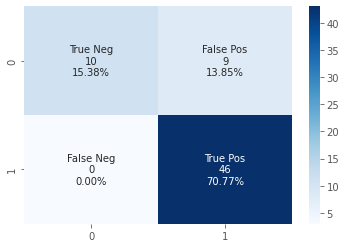

In [85]:
pred_logr=logr_best.predict(X1_test)
print("Accuracy score for Logistic Regression:",accuracy_score(y1_test,pred_logr))
cf_matrix4 = confusion_matrix(y1_test, pred_logr)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix4, annot=labels, fmt='', cmap='Blues');
print(classification_report(y1_test, pred_logr))

Here, we compare the accuracy values ​​of the 4 classification algorithms we used in the hiring decision with a graph. The algorithm that gives the most appropriate percentage of accuracy to my model is the Logistic Regression algorithm.

0.8615384615384616
0.7692307692307693
0.7846153846153846
0.8307692307692308


Text(0, 0.5, 'Accuracy')

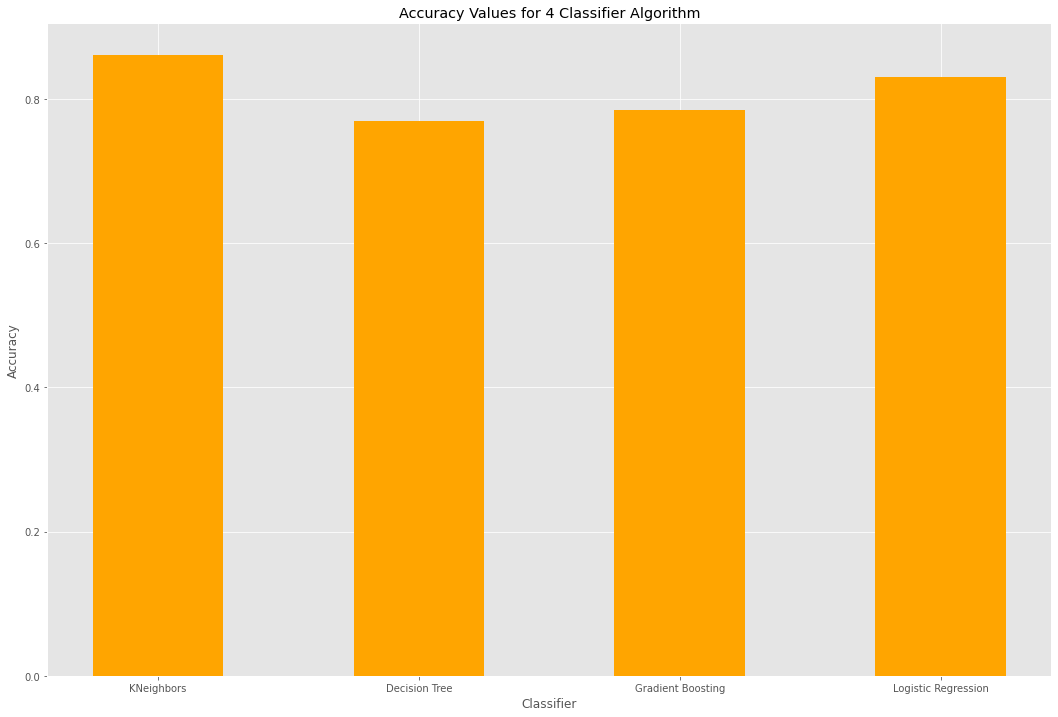

In [86]:
acc_knn = accuracy_score(y1_test,pred_knnc)
print(acc_knn)
acc_dc = accuracy_score(y1_test,pred_dtc)
print(acc_dc)
acc_gb = accuracy_score(y1_test,pred_gbc)
print(acc_gb)
acc_logr = accuracy_score(y1_test,pred_logr)
print(acc_logr)
classifier_name = ["KNeighbors","Decision Tree","Gradient Boosting","Logistic Regression"]
accuracy_scores = [acc_knn, acc_dc, acc_gb,acc_logr]
fig = plt.figure(figsize = (18, 12))
plt.bar(classifier_name, accuracy_scores, color ='orange', width = 0.5) 
plt.title("Accuracy Values ​​for 4 Classifier Algorithm")
plt.xlabel("Classifier")
plt.ylabel("Accuracy")

# **6. Results and Discussion**
Gradient Boosting Regressor, KNeighbors Regressor, Random Forest Regressor, Linear Regression, Ridge and Lasso were used for salary prediction. The optimum result was achieved with Gradient Boosting Regressor. The r2 score value is 86.2%. KNN Classifier, Decision Tree Classifier, Gradient Boosting Classifier and Logistic Regression were used while deciding on the recruitment of the candidate. The most successful model was achieved with KNeigbors Classifier with 86.2% accuracy. 
More successful models can be obtained with different parameters by increasing the number of parameters with more powerful devices.

# **7. Conclusion and Future Works**
In this project, the regression and classification problem was solved in order to speed up the recruitment processes of the human resources unit and to offer a fair salary to the newly graduated candidates by using various algorithms.

Gradient Boosting Regressor algorithm gave the best result with 86.2%. For Classification, 86.2% KNeigbors gave the best result.


Project inputs can be updated in line with the needs of the companies and new outputs can be obtained. For example, for a software company, various factors such as the candidate's age, grade point average, algorithm exam score, technical interview exam score can be taken into account. A salary proposal can be presented by evaluating these inputs within the framework of certain weights. Company employees can also be regularly evaluated within the framework of certain exams, and company personnel salaries can be updated, thus increasing the quality of the company by ensuring that the company is more proactive.

# **8. References**
[**1**]Chen, S., & Chen, H. (2017). A machine learning approach to predict the success of job candidates. Expert Systems with Applications, 79, 199-209. 

[**2**]Chen, S., & Chen, H. (2016). A machine learning approach to predict the success of job candidates based on language used in job advertisements and resumes. Computers in Human Behavior, 63, 707-717. 

[**3**]Breaugh, J. A., & Starke, M. A. (2012). Predicting job performance: A meta-analysis of the validity of selection procedures. Personnel Psychology, 65(1), 121-165. 

[**4**]Arjundattaraju. (2022, April 22). Recruiment. Kaggle. Retrieved December 25, 2022, from https://www.kaggle.com/code/arjundattaraju/campusplacement-regressn-classifacatn#Feature-Engineering  